# SENTIMENT ANALYSIS OF ASDA REVIEWS -  MODEL PROCESSING

In this notebook I will prepare the data so it can be used for building model for review prediction

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import textblob
import nltk
from nltk.stem.snowball import SnowballStemmer
from textblob import Word
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.max_columns", None)

In [17]:
filtered_df = pd.read_csv('filtered_trustpilot_reviews.csv')

In [18]:
filtered_df.head()

,User,Rating,Location,Date,ExperienceDate,ReviewHeading,ReviewContent
0,Nichola,1.0,GB,2023-10-24 05:22:49.000,2023-09-15,I went in the large Asda Worksop S80 todo…,I went in the Asda Worksop S80 3NE todo my wee...
1,Robert B,1.0,GB,2023-10-22 10:45:01.000,2023-09-01,Never work for asda,Don't ever work for asda ....Wanted to work fo...
2,Tom,1.0,GB,2023-10-25 10:29:52.000,2023-09-27,ASDA - not refunding and not communicating.,Ordered online £72.00 of items.ASDA amended th...
3,Uno,NaN,GB,2023-10-22 07:18:18.000,2023-07-15,RUBBISH,"RUBBISH , I had so many orders and every time ..."
4,Iain,1.0,GB,2023-10-11 01:03:43.000,2023-06-12,Asda Irvine rude staff member behind…,Asda Irvine rude staff member behind counter t...


### Removing stop Words

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [20]:
# Convert the review content to lowercase and create a new column 'Lowercase'
filtered_df['Lowercase'] = filtered_df['ReviewContent'].apply(lambda x: ' '.join(word.lower() for word in str(x).split()))


In [21]:
# Remove non-alphanumeric characters and create a new column 'Cleaned'
filtered_df['Cleaned'] = filtered_df['Lowercase'].str.replace('[^\w\s]', '')


In [22]:
# Tokenize and remove stop words for each cleaned review, then store in 'Reviews_noStopWords' list
Reviews_noStopWords = []

for i in range(len(filtered_df)):
    
    # Retrieve and preprocess the cleaned review
    review = str(filtered_df['Cleaned'][i])
    review = review
    review = review.lower()
    
    stop_words = set(stopwords.words('english'))
    
    # Tokenize the review
    word_tokens = word_tokenize(review)
    
    # Filter out stop words
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    
    Reviews_noStopWords.append(filtered_sentence)

In [24]:
# Assign the tokenized reviews without stop words to a new column
filtered_df['No_Stop_Words:Tokens'] = Reviews_noStopWords


In [25]:
# Create a sentence from the tokenized reviews without stop words and store it in a new column
filtered_df['No_Stop_Words:Sentence'] = Reviews_noStopWords

# Iterate through the DataFrame to concatenate the words into sentences
for i in range(len(filtered_df)): 
    text_list = filtered_df['No_Stop_Words:Tokens'][i]
    blank = ''
    for word in text_list:
        blank = blank+' '+word
        
    # Store the resulting sentence in the designated column
    filtered_df['No_Stop_Words:Sentence'][i] = blank

### Number of stopwords

In [26]:
# Count the number of stop words in each review and store the counts in a list
Stop_Word_Count = []
for i in range(len(filtered_df)):
    review = str(filtered_df['ReviewContent'][i]).lower()
    count = 0
    # Iterate through the words in the review and count stop words
    for word in review.split():
        if word in stop_words:
            count += 1
    Stop_Word_Count.append(count)

# Create a new column to store the stop word counts for each review
filtered_df['Stop_Word_Count'] = Stop_Word_Count


In [27]:
# Calculate the word count for each review and create a new column 'Review_Word_Count'
filtered_df['Review_Word_Count'] = filtered_df['ReviewContent'].apply(lambda x: len(str(x).split()))


### Percentage of Stop words

Text(0, 0.5, 'Stop Word Percentage')

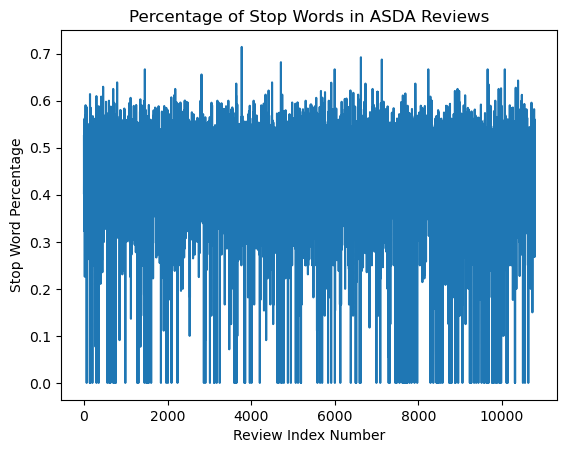

In [28]:
# Calculate the percentage of stop words in each review and plot the distribution
full = filtered_df['Review_Word_Count']
partial = filtered_df['Stop_Word_Count']

# Calculate the stop word percentage and create a new column
filtered_df['Stop_Words_%'] = partial / full

# Plot the distribution of stop word percentages
filtered_df['Stop_Words_%'].plot()
plt.title('Percentage of Stop Words in ASDA Reviews')
plt.xlabel('Review Index Number')
plt.ylabel('Stop Word Percentage')


In [29]:
filtered_df.head()

,User,Rating,Location,Date,ExperienceDate,ReviewHeading,ReviewContent,Lowercase,Cleaned,No_Stop_Words:Sentence,No_Stop_Words:Tokens,Stop_Word_Count,Review_Word_Count,Stop_Words_%
0,Nichola,1.0,GB,2023-10-24 05:22:49.000,2023-09-15,I went in the large Asda Worksop S80 todo…,I went in the Asda Worksop S80 3NE todo my wee...,i went in the asda worksop s80 3ne todo my wee...,i went in the asda worksop s80 3ne todo my wee...,"went asda worksop s80 3ne todo weekly shop , ...","[went, asda, worksop, s80, 3ne, todo, weekly, ...",53,101,0.524752
1,Robert B,1.0,GB,2023-10-22 10:45:01.000,2023-09-01,Never work for asda,Don't ever work for asda ....Wanted to work fo...,don't ever work for asda ....wanted to work fo...,don't ever work for asda ....wanted to work fo...,n't ever work asda .... wanted work asda year...,"[n't, ever, work, asda, ...., wanted, work, as...",59,147,0.401361
2,Tom,1.0,GB,2023-10-25 10:29:52.000,2023-09-27,ASDA - not refunding and not communicating.,Ordered online £72.00 of items.ASDA amended th...,ordered online £72.00 of items.asda amended th...,ordered online £72.00 of items.asda amended th...,ordered online £72.00 items.asda amended orde...,"[ordered, online, £72.00, items.asda, amended,...",48,114,0.421053
3,Uno,NaN,GB,2023-10-22 07:18:18.000,2023-07-15,RUBBISH,"RUBBISH , I had so many orders and every time ...","rubbish , i had so many orders and every time ...","rubbish , i had so many orders and every time ...","rubbish , many orders every time asda said , ...","[rubbish, ,, many, orders, every, time, asda, ...",16,36,0.444444
4,Iain,1.0,GB,2023-10-11 01:03:43.000,2023-06-12,Asda Irvine rude staff member behind…,Asda Irvine rude staff member behind counter t...,asda irvine rude staff member behind counter t...,asda irvine rude staff member behind counter t...,asda irvine rude staff member behind counter ...,"[asda, irvine, rude, staff, member, behind, co...",47,111,0.423423


In [30]:
import re
import string

# Preprocess the text by removing special characters, square brackets content, punctuation, and words containing numbers
filtered_df['No_Stop_Words:Sentence'] = filtered_df['No_Stop_Words:Sentence'].str.replace('[^A-Za-z]+', ' ')

# Define a function for text cleaning
def text_clean(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

# Apply the text cleaning function to the 'No_Stop_Words:Sentence' column
filtered_df['No_Stop_Words:Sentence'] = filtered_df['No_Stop_Words:Sentence'].apply(text_clean)


In [31]:
# Combine all sentences in the 'No_Stop_Words:Sentence' column, split into words, and count the top 20 most frequent words
pd.Series(''.join(filtered_df['No_Stop_Words:Sentence']).split()).value_counts()[:20]


asda        12831
delivery     7507
’            6902
order        6776
nt           6482
customer     5497
service      5488
shopping     4154
time         4072
get          4063
would        4061
store        3877
items        3815
told         3381
£            3372
online       3150
refund       3142
never        2957
shop         2856
back         2856
Name: count, dtype: int64

### Stemming and Lemmatization

In [32]:
# Apply lemmatization to each sentence in the 'No_Stop_Words:Sentence' column
filtered_df['Lemmatized'] = filtered_df['No_Stop_Words:Sentence'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))


In [33]:
# Initialize a Snowball stemmer for English
snowBallStemmer = SnowballStemmer("english")

# Tokenize the sentence in the 'Lemmatized' column
sentence = filtered_df['Lemmatized'][40]
wordList = nltk.word_tokenize(sentence)

# Apply stemming to each word in the tokenized sentence
stemWords = [snowBallStemmer.stem(word) for word in wordList]

# Join the stemmed words into a single string
stemmed = ' '.join(stemWords)

# Print the original and stemmed sentences
print(sentence)
print('')
print(stemmed)


made order via topcashback rejected said used code absolutely

made order via topcashback reject said use code absolut


In [34]:
# Function to extract words from a sentence
def word_extraction(sentence):
    # Remove non-alphanumeric characters and split the sentence into words
    words = re.sub("[^\w]", " ",  sentence).split()
    # Convert words to lowercase for consistency
    cleaned_text = [w.lower() for w in words]
    return cleaned_text


In [35]:
# Stemming the lemmatized sentences using SnowballStemmer
stemmed_list = []  # List to store the stemmed sentences
stemmed_tokens_list = []  # List to store individual stemmed tokens

for i in range(len(filtered_df)):
    sentence = filtered_df['Lemmatized'][i]
    wordList = nltk.word_tokenize(sentence)
    
    # Stemming each word in the sentence
    stemWords = [snowBallStemmer.stem(word) for word in wordList]
    
    # Joining the stemmed words to form a sentence
    stemmed = ' '.join(stemWords)
    
    # Appending the stemmed sentence to the list
    stemmed_list.append(stemmed)


In [36]:
# Adding a new column to the DataFrame to store the stemmed sentences
filtered_df['Stemmed:Sentence'] = stemmed_list


In [37]:
# Tokenizing the stemmed sentences and storing the result in a list
for i in range(len(filtered_df)):
    stemmed_sentence = filtered_df['Stemmed:Sentence'][i]
    tokens = word_extraction(stemmed_sentence)
    stemmed_tokens_list.append(tokens)


In [38]:
filtered_df['Stemmed:Tokens'] = stemmed_tokens_list

In [39]:
filtered_df['Stemmed:Tokens'][1]

['nt',
 'ever',
 'work',
 'asda',
 'want',
 'work',
 'asda',
 'year',
 'hgv',
 'driver',
 'final',
 'got',
 'sack',
 'spot',
 'thing',
 'nt',
 'like',
 'new',
 'born',
 'child',
 'soon',
 'patern',
 'mention',
 'first',
 'week',
 'thrown',
 'door',
 'disgust',
 'would',
 'commit',
 'rest',
 'work',
 'career',
 'would',
 'done',
 'overtim',
 'anyth',
 'ask',
 'driver',
 'tell',
 'run',
 've',
 'hour',
 'say',
 'm',
 'man',
 'pissoff',
 'one',
 'driver',
 'met',
 'would',
 'commit',
 'like',
 'would',
 'm',
 'go',
 'short',
 'dismantl',
 'asda',
 'imag',
 'via',
 'social',
 'medium',
 'local',
 'paper',
 'promis',
 've',
 'end',
 'employ',
 'provid',
 'kid',
 's',
 'fair',
 'disrupt',
 'asda',
 'imag',
 'head',
 'offic',
 'leed',
 'get',
 'readi']

In [40]:
filtered_df['Stemmed_Word_Count'] = filtered_df['Stemmed:Sentence'].apply(lambda x: len(str(x).split()))

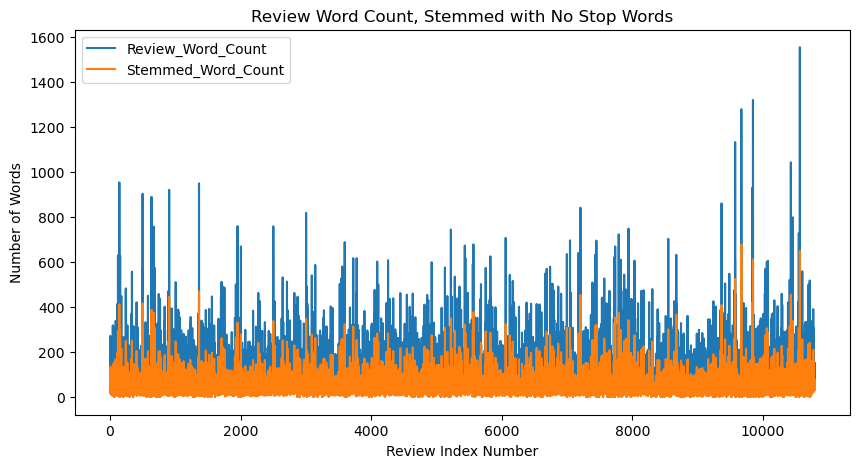

In [41]:
# Plotting the distribution of review word count and stemmed word count for reviews with certain length constraints
plt.figure(figsize=(10,5))
filtered_df[filtered_df['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
filtered_df[filtered_df['Stemmed_Word_Count']< 1000]['Stemmed_Word_Count'].plot()
plt.title('Review Word Count, Stemmed with No Stop Words')
plt.xlabel('Review Index Number')
plt.ylabel('Number of Words')
plt.legend()

As seen from the plot above stemming will be imporatnt for computational speed as it shrinks down long reviews

## Positive Opinion Count

In [42]:
# Reading positive lexicon from a file and creating a list of stemmed words
file = open("positive_lexicon.txt", "r")
content = file.read()
pos_lex = content.splitlines()
pos_lex_stem = [snowBallStemmer.stem(word) for word in pos_lex]


In [43]:
# Initializing a list to store the count of positive lexicon words in each review
good_count = []

# Iterating through each review in the filtered DataFrame
for i in range(len(filtered_df)):
    # Initializing a counter for positive lexicon words in the current review
    count = 0
    
    # Extracting the stemmed tokens of the current review
    tokens = filtered_df['Stemmed:Tokens'][i]
    
    # Counting the occurrences of positive lexicon words in the review
    for word in tokens:
        if word in pos_lex_stem:
            count += 1
    
    # Appending the count to the list
    good_count.append(count)


In [45]:
filtered_df['Positive_Word_Count'] = good_count

In [46]:
# Calculating the percentage of positive words in each review
filtered_df['Positive_Words_%'] = filtered_df['Positive_Word_Count'] / (filtered_df['Review_Word_Count'] - filtered_df['Stop_Word_Count'])


Text(0, 0.5, 'Percentage')

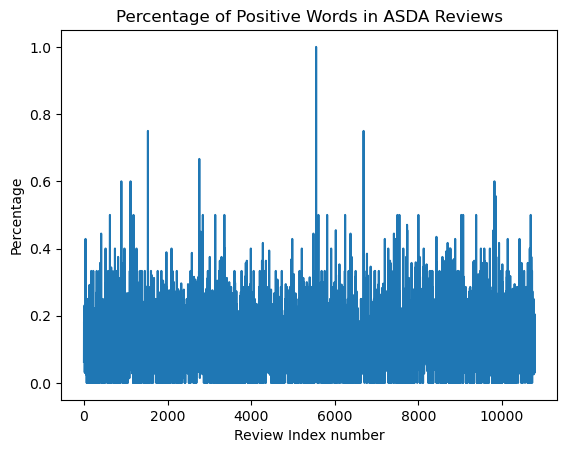

In [47]:
# Plotting the percentage of positive words in ASDA reviews
filtered_df['Positive_Words_%'].plot()
plt.title('Percentage of Positive Words in ASDA Reviews')
plt.xlabel('Review Index number')
plt.ylabel('Percentage')


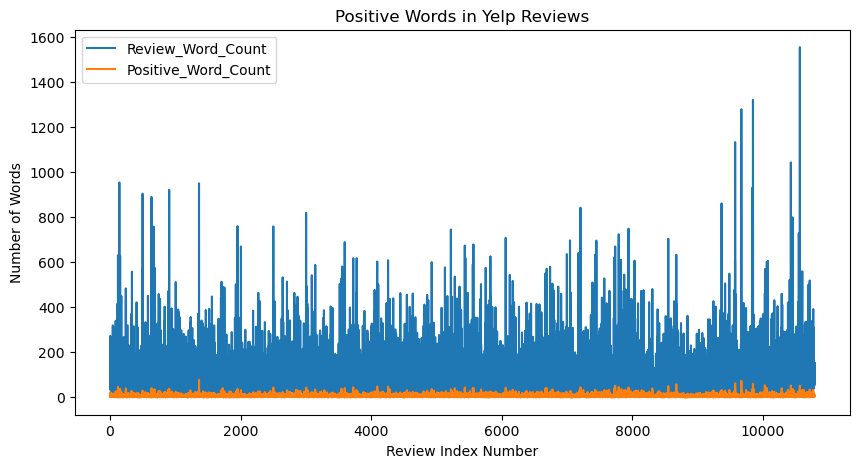

In [48]:
# Plotting the word count of reviews, considering only those with less than 2000 words and the positive word count
plt.figure(figsize=(10,5))
filtered_df[filtered_df['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
filtered_df[filtered_df['Positive_Word_Count']< 600]['Positive_Word_Count'].plot()
plt.title('Positive Words in Yelp Reviews')
plt.xlabel('Review Index Number')
plt.ylabel('Number of Words')
plt.legend()


from the graph number of positive words each reviw is quite low

### Polarity and Subjectivity

In [49]:
from textblob import TextBlob

In [50]:
# Calculating the polarity and subjectivity of each review using TextBlob sentiment analysis
filtered_df['Polarity'] = filtered_df['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])
filtered_df['Subjectivity'] = filtered_df['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])


### Polarity and Positive Word Percentage

In [51]:
# Sorting and resetting index for negative, positive, and neutral sentiment DataFrames
df1 = filtered_df[filtered_df['Polarity'] < 0].sort_values(by='Polarity').reset_index()
df2 = filtered_df[filtered_df['Polarity'] > 0].sort_values(by='Polarity').reset_index()
df3 = filtered_df[filtered_df['Polarity'] == 0].sort_values(by='Polarity').reset_index()

# Reassigning indices for neutral and positive sentiment DataFrames
df3.index = np.arange(len(df1), (len(df1) + len(df3)))
df2.index = np.arange((len(df3) + len(df1)), (len(df1) + len(df3) + len(df2)))


In [52]:
# Creating a copy of the DataFrame and sorting it based on polarity
df4 = filtered_df.copy().sort_values(by='Polarity')


A plot to visualize the distribution of the percentage of positive words in ASDA reviews sorted by their sentiment polarity.

Text(0, 0.5, 'Positive Word Percentage')

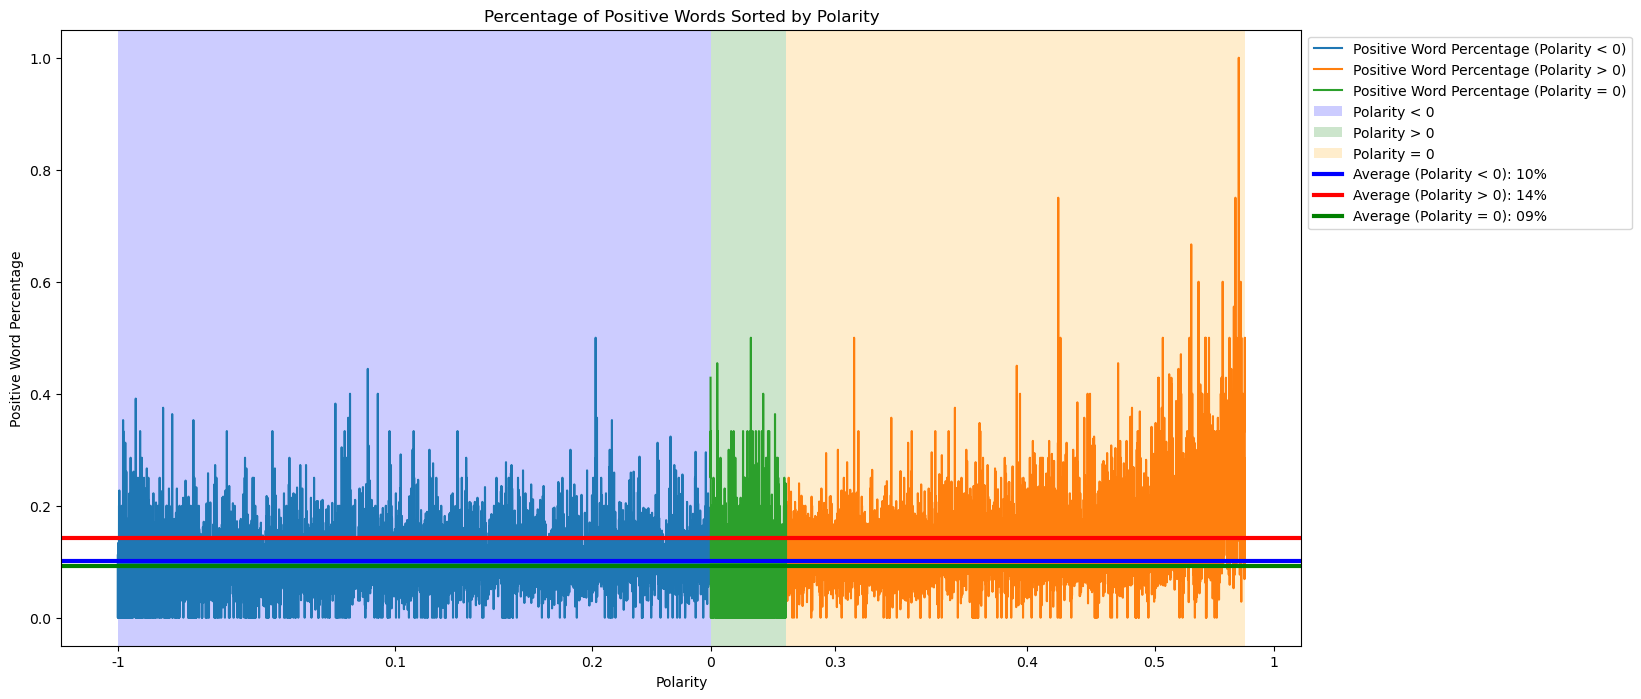

In [53]:
import matplotlib.transforms as transforms


x = filtered_df.index


# Setting up the figure and axes for plotting
fig, ax = plt.subplots(figsize=(16,8))

# Setting x-axis values for different polarity zones
x1 = df1.index
y1 = df1['Positive_Words_%']
x2 = df2.index
y2 = df2['Positive_Words_%']
x3 = df3.index
y3 = df3['Positive_Words_%']

# Calculating average for each polarity zone
av1 = df1['Positive_Words_%'].mean()
av2 = df2['Positive_Words_%'].mean()
av3 = df3['Positive_Words_%'].mean()

# Plotting positive word percentage for each polarity zone
plt.plot(x1, y1, label='Positive Word Percentage (Polarity < 0)')
plt.plot(x2, y2, label='Positive Word Percentage (Polarity > 0)')
plt.plot(x3, y3, label='Positive Word Percentage (Polarity = 0)')

# Plotting areas to define polarity zones
plt.axvspan(0, len(df1), facecolor='blue', alpha=0.2, label='Polarity < 0')
plt.axvspan(len(df1), (len(df1) + len(df3)), facecolor='green', alpha=0.2, label='Polarity > 0')
plt.axvspan((len(df1) + len(df3)), (len(df1) + len(df3) + len(df2)), facecolor='orange', alpha=0.2, label='Polarity = 0')

# Plotting average lines
plt.axhline(y=av1, linewidth=3, color='b', label='Average (Polarity < 0): ' + str(av1)[2:4] + '%')
plt.axhline(y=av2, linewidth=3, color='r', label='Average (Polarity > 0): ' + str(av2)[2:4] + '%')
plt.axhline(y=av3, linewidth=3, color='g', label='Average (Polarity = 0): ' + str(av3)[2:4] + '%')

# Labeling x-axis as polarity
labels = ['-1', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '1']
ticks = [0, len(df1), 2655, 4539, 6869, 8704, 9924, 11065]

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adding legend, title, and labels
ax.legend(bbox_to_anchor=(1, 1))
plt.title('Percentage of Positive Words Sorted by Polarity')
plt.xlabel('Polarity')
plt.ylabel('Positive Word Percentage')


In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Create an empty list to store sentiment labels
sentiments = []
compounds =[]
scores=[]

# Loop through the rows and analyze sentiment
for index, row in filtered_df.iterrows():
    text = row['Lemmatized']
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    
    if compound >= 0.05:
        sentiment = "Positive"
    elif compound <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    compounds.append(compound)
    sentiments.append(sentiment)
    scores.append(score)

# Add the 'sentiment' column to the DataFrame
filtered_df['compound'] = compounds
filtered_df['sentiment'] = sentiments

In [55]:
filtered_df.columns

Index(['User', 'Rating', 'Location', 'Date', 'ExperienceDate', 'ReviewHeading',
       'ReviewContent', 'Lowercase', 'Cleaned', 'No_Stop_Words:Sentence',
       'No_Stop_Words:Tokens', 'Stop_Word_Count', 'Review_Word_Count',
       'Stop_Words_%', 'Lemmatized', 'Stemmed:Sentence', 'Stemmed:Tokens',
       'Stemmed_Word_Count', 'Positive_Word_Count', 'Positive_Words_%',
       'Polarity', 'Subjectivity', 'compound', 'sentiment'],
      dtype='object')

In [56]:
filtered_df.head()

,User,Rating,Location,Date,ExperienceDate,ReviewHeading,ReviewContent,Lowercase,Cleaned,No_Stop_Words:Sentence,No_Stop_Words:Tokens,Stop_Word_Count,Review_Word_Count,Stop_Words_%,Lemmatized,Stemmed:Sentence,Stemmed:Tokens,Stemmed_Word_Count,Positive_Word_Count,Positive_Words_%,Polarity,Subjectivity,compound,sentiment
0,Nichola,1.0,GB,2023-10-24 05:22:49.000,2023-09-15,I went in the large Asda Worksop S80 todo…,I went in the Asda Worksop S80 3NE todo my wee...,i went in the asda worksop s80 3ne todo my wee...,i went in the asda worksop s80 3ne todo my wee...,went asda worksop todo weekly shop purchas...,"[went, asda, worksop, s80, 3ne, todo, weekly, ...",53,101,0.524752,went asda worksop todo weekly shop purchased p...,went asda worksop todo week shop purchas pack ...,"[went, asda, worksop, todo, week, shop, purcha...",46,3,0.062500,0.050000,0.350000,-0.3612,Negative
1,Robert B,1.0,GB,2023-10-22 10:45:01.000,2023-09-01,Never work for asda,Don't ever work for asda ....Wanted to work fo...,don't ever work for asda ....wanted to work fo...,don't ever work for asda ....wanted to work fo...,nt ever work asda wanted work asda years hgv...,"[n't, ever, work, asda, ...., wanted, work, as...",59,147,0.401361,nt ever work asda wanted work asda year hgv dr...,nt ever work asda want work asda year hgv driv...,"[nt, ever, work, asda, want, work, asda, year,...",81,12,0.136364,0.035522,0.506061,0.8750,Positive
2,Tom,1.0,GB,2023-10-25 10:29:52.000,2023-09-27,ASDA - not refunding and not communicating.,Ordered online £72.00 of items.ASDA amended th...,ordered online £72.00 of items.asda amended th...,ordered online £72.00 of items.asda amended th...,ordered online £ itemsasda amended order info...,"[ordered, online, £72.00, items.asda, amended,...",48,114,0.421053,ordered online £ itemsasda amended order infor...,order onlin £ itemsasda amend order inform ite...,"[order, onlin, itemsasda, amend, order, inform...",60,12,0.181818,-0.065000,0.300000,0.6369,Positive
3,Uno,NaN,GB,2023-10-22 07:18:18.000,2023-07-15,RUBBISH,"RUBBISH , I had so many orders and every time ...","rubbish , i had so many orders and every time ...","rubbish , i had so many orders and every time ...",rubbish many orders every time asda said oh...,"[rubbish, ,, many, orders, every, time, asda, ...",16,36,0.444444,rubbish many order every time asda said oh ite...,rubbish mani order everi time asda said oh ite...,"[rubbish, mani, order, everi, time, asda, said...",18,3,0.150000,-0.250000,0.750000,0.4585,Positive
4,Iain,1.0,GB,2023-10-11 01:03:43.000,2023-06-12,Asda Irvine rude staff member behind…,Asda Irvine rude staff member behind counter t...,asda irvine rude staff member behind counter t...,asda irvine rude staff member behind counter t...,asda irvine rude staff member behind counter ...,"[asda, irvine, rude, staff, member, behind, co...",47,111,0.423423,asda irvine rude staff member behind counter c...,asda irvin rude staff member behind counter co...,"[asda, irvin, rude, staff, member, behind, cou...",62,5,0.078125,-0.345455,0.469697,-0.9542,Negative


In [57]:
filtered_df_analyzed = filtered_df[['User', 'Rating', 'Location', 'Date', 'ExperienceDate', 'ReviewHeading',
       'ReviewContent', 'Review_Word_Count', 'Lowercase', 'Cleaned',
       'No_Stop_Words:Tokens', 'No_Stop_Words:Sentence', 'Stop_Word_Count',
       'Stop_Words_%', 'Lemmatized', 'Stemmed:Sentence', 'Stemmed:Tokens',
       'Stemmed_Word_Count', 'Positive_Word_Count', 'Positive_Words_%',
       'Polarity', 'Subjectivity']]

In [58]:
filtered_df_analyzed.to_csv(r'filtered_df_analyzed.csv', index=False)

In [59]:
filtered_df_analyzed.to_csv(r'asda_reviews_sentiment.csv', index=False)

# MODEL DATA PROCESSING

In [60]:
asda_data = pd.read_csv('filtered_df_analyzed.csv')
asda_data.head()

,User,Rating,Location,Date,ExperienceDate,ReviewHeading,ReviewContent,Review_Word_Count,Lowercase,Cleaned,No_Stop_Words:Tokens,No_Stop_Words:Sentence,Stop_Word_Count,Stop_Words_%,Lemmatized,Stemmed:Sentence,Stemmed:Tokens,Stemmed_Word_Count,Positive_Word_Count,Positive_Words_%,Polarity,Subjectivity
0,Nichola,1.0,GB,2023-10-24 05:22:49.000,2023-09-15,I went in the large Asda Worksop S80 todo…,I went in the Asda Worksop S80 3NE todo my wee...,101,i went in the asda worksop s80 3ne todo my wee...,i went in the asda worksop s80 3ne todo my wee...,"['went', 'asda', 'worksop', 's80', '3ne', 'tod...",went asda worksop todo weekly shop purchas...,53,0.524752,went asda worksop todo weekly shop purchased p...,went asda worksop todo week shop purchas pack ...,"['went', 'asda', 'worksop', 'todo', 'week', 's...",46,3,0.062500,0.050000,0.350000
1,Robert B,1.0,GB,2023-10-22 10:45:01.000,2023-09-01,Never work for asda,Don't ever work for asda ....Wanted to work fo...,147,don't ever work for asda ....wanted to work fo...,don't ever work for asda ....wanted to work fo...,"[""n't"", 'ever', 'work', 'asda', '....', 'wante...",nt ever work asda wanted work asda years hgv...,59,0.401361,nt ever work asda wanted work asda year hgv dr...,nt ever work asda want work asda year hgv driv...,"['nt', 'ever', 'work', 'asda', 'want', 'work',...",81,12,0.136364,0.035522,0.506061
2,Tom,1.0,GB,2023-10-25 10:29:52.000,2023-09-27,ASDA - not refunding and not communicating.,Ordered online £72.00 of items.ASDA amended th...,114,ordered online £72.00 of items.asda amended th...,ordered online £72.00 of items.asda amended th...,"['ordered', 'online', '£72.00', 'items.asda', ...",ordered online £ itemsasda amended order info...,48,0.421053,ordered online £ itemsasda amended order infor...,order onlin £ itemsasda amend order inform ite...,"['order', 'onlin', 'itemsasda', 'amend', 'orde...",60,12,0.181818,-0.065000,0.300000
3,Uno,NaN,GB,2023-10-22 07:18:18.000,2023-07-15,RUBBISH,"RUBBISH , I had so many orders and every time ...",36,"rubbish , i had so many orders and every time ...","rubbish , i had so many orders and every time ...","['rubbish', ',', 'many', 'orders', 'every', 't...",rubbish many orders every time asda said oh...,16,0.444444,rubbish many order every time asda said oh ite...,rubbish mani order everi time asda said oh ite...,"['rubbish', 'mani', 'order', 'everi', 'time', ...",18,3,0.150000,-0.250000,0.750000
4,Iain,1.0,GB,2023-10-11 01:03:43.000,2023-06-12,Asda Irvine rude staff member behind…,Asda Irvine rude staff member behind counter t...,111,asda irvine rude staff member behind counter t...,asda irvine rude staff member behind counter t...,"['asda', 'irvine', 'rude', 'staff', 'member', ...",asda irvine rude staff member behind counter ...,47,0.423423,asda irvine rude staff member behind counter c...,asda irvin rude staff member behind counter co...,"['asda', 'irvin', 'rude', 'staff', 'member', '...",62,5,0.078125,-0.345455,0.469697


### Categorization and Dummy Variables

In [61]:
# Count of rows where 'Polarity' column is neutral, postive and negative
print(asda_data[asda_data['Polarity'] == 0].shape[0])
print(asda_data[asda_data['Polarity'] > 0].shape[0])
print(asda_data[asda_data['Polarity'] < 0].shape[0])

724
4392
5674


Here I will sort the data into positive and negative sentiment. I will ignore the neutral as its just 724 rows compared to positive sentiments and negative to prevent data imbalance

In [62]:
# Remove reviews with neutral polarity (Polarity = 0)
asda_data = asda_data[asda_data['Polarity'] != 0]

# Resetting the index after removing rows
asda_data = asda_data.reset_index()


In [63]:
# Assigning sentiment based on Polarity
sentiment = []

for i in range(len(asda_data)):
    if asda_data['Polarity'][i] > 0:
        sentiment.append('Positive')
    if asda_data['Polarity'][i] < 0:
        sentiment.append('Negative')

# Creating 'sentiment' column
asda_data['sentiment'] = sentiment


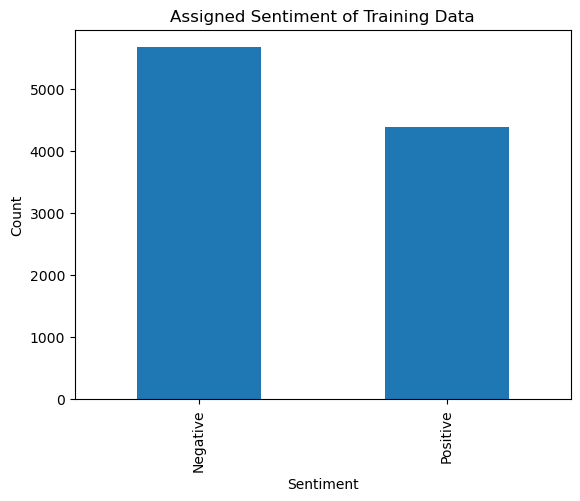

In [64]:
# Plotting the distribution of assigned sentiments
sentiment_counts = asda_data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Assigned Sentiment of Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('sentiment_distribution_plot.png', format='png', dpi=300)
plt.show()


### Features relationship to Sentiment Labels
Here I will check for features that correlates with the sentiments. This will be necessary when building the ML models

In [228]:
# Renaming columns for clarity in ASDA data
asda_data = asda_data.rename(columns={'Stop_Words_%': 'Stop_Words_P'})
asda_data = asda_data.rename(columns={'Positive_Words_%': 'Positive_Words_Percent'})


#### histogram for stop word percentage

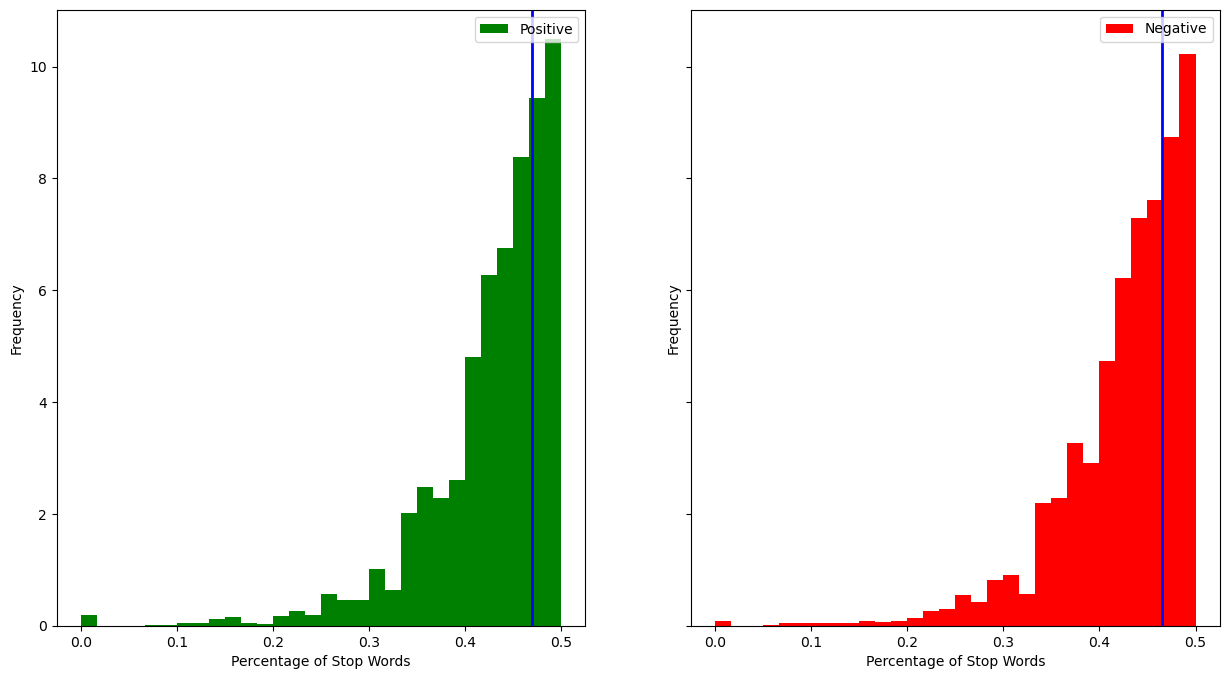

In [182]:
# Visualizing the distribution of Stop Words Percentage for Positive and Negative Sentiments
fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharex=True, sharey=True)

# Positive Sentiment Histogram
axs[0].hist(asda_data[asda_data.sentiment == 'Positive'].Stop_Words_P, bins=30, density=True, range=(0, 0.5),
            color='green', label="Positive Sentiment")
axs[0].axvline(np.median(asda_data[asda_data.sentiment == 'Positive'].Stop_Words_P), color='b', lw=2)
axs[0].legend(loc="upper right")

# Negative Sentiment Histogram
axs[1].hist(asda_data[asda_data.sentiment == 'Negative'].Stop_Words_P, bins=30, density=True, range=(0, 0.5),
            color='red', label="Negative Sentiment")
axs[1].axvline(np.median(asda_data[asda_data.sentiment == 'Negative'].Stop_Words_P), color='b', lw=2)
axs[1].legend(loc="upper right")

# Setting labels
for ax in axs.flat:
    ax.set(xlabel='Percentage of Stop Words', ylabel='Frequency')

# Displaying the plot
plt.show()


In [183]:
# Printing the values
print('Positive: ',np.median(asda_data[asda_data.sentiment == 'Positive'].Stop_Words_P))
print('Negative: ',np.median(asda_data[asda_data.sentiment == 'Negative'].Stop_Words_P))

Positive:  0.4693877551020408
Negative:  0.4651162790697674


#### Histogram for positive word percentage

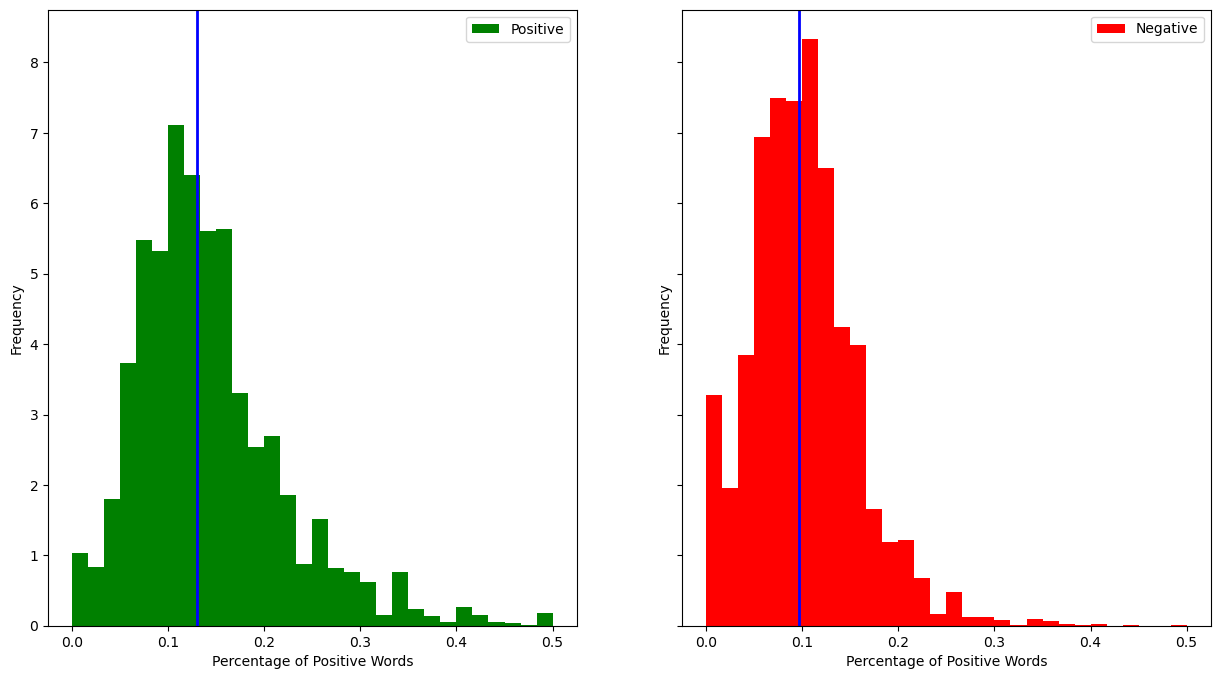

In [184]:
# Visualizing the distribution of Positive Words Percentage for Positive and Negative Sentiments
fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharex=True, sharey=True)

# Positive Sentiment Histogram
axs[0].hist(asda_data[asda_data.sentiment == 'Positive'].Positive_Words_Percent, bins=30, density=True, range=(0, 0.5),
            color='green', label="Positive Sentiment")
axs[0].axvline(np.median(asda_data[asda_data.sentiment == 'Positive'].Positive_Words_Percent), color='b', lw=2)
axs[0].legend(loc="upper right")

# Negative Sentiment Histogram
axs[1].hist(asda_data[asda_data.sentiment == 'Negative'].Positive_Words_Percent, bins=30, density=True, range=(0, 0.5),
            color='red', label="Negative Sentiment")
axs[1].axvline(np.median(asda_data[asda_data.sentiment == 'Negative'].Positive_Words_Percent), color='b', lw=2)
axs[1].legend(loc="upper right")

# Setting labels
for ax in axs.flat:
    ax.set(xlabel='Percentage of Positive Words', ylabel='Frequency')

# Displaying the plot
plt.show()


In [229]:
### Printing the values
print('Positive: ',np.median(asda_data[asda_data.sentiment == 'Positive'].Positive_Words_Percent))
print('Negative: ',np.median(asda_data[asda_data.sentiment == 'Negative'].Positive_Words_Percent))

Positive:  0.1296296296296296
Negative:  0.0967741935483871


#### Histogram for stemmed word percentage

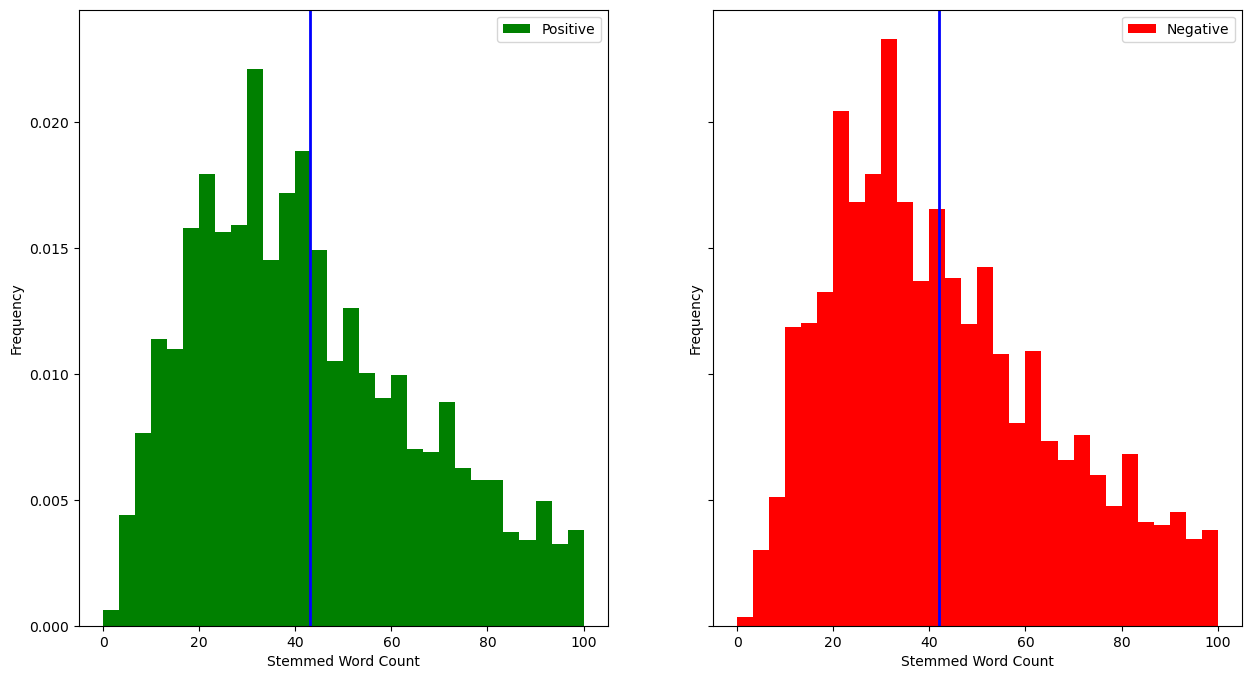

In [186]:
# Visualizing the distribution of Stemmed Word Count for Positive and Negative Sentiments
fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharex=True, sharey=True)

# Positive Sentiment Histogram
axs[0].hist(asda_data[asda_data.sentiment == 'Positive'].Stemmed_Word_Count, bins=30, density=True, range=(0, 100),
            color='green', label="Positive Sentiment")
axs[0].axvline(np.median(asda_data[asda_data.sentiment == 'Positive'].Stemmed_Word_Count), color='b', lw=2)
axs[0].legend(loc="upper right")

# Negative Sentiment Histogram
axs[1].hist(asda_data[asda_data.sentiment == 'Negative'].Stemmed_Word_Count, bins=30, density=True, range=(0, 100),
            color='red', label="Negative Sentiment")
axs[1].axvline(np.median(asda_data[asda_data.sentiment == 'Negative'].Stemmed_Word_Count), color='b', lw=2)
axs[1].legend(loc="upper right")

# Setting labels
for ax in axs.flat:
    ax.set(xlabel='Stemmed Word Count', ylabel='Probability Density')

# Displaying the plot
plt.show()


In [187]:
### Printing the values
print('Positive: ',np.median(asda_data[asda_data.sentiment == 'Positive'].Stemmed_Word_Count))
print('Negative: ',np.median(asda_data[asda_data.sentiment == 'Negative'].Stemmed_Word_Count))

Positive:  43.0
Negative:  42.0


the positive word percentage makes more sense in relations to sentiment. 

I will then convert the tokenized reviews into word vectors using CountVectorizer and TFIDF

### CountVectorizer

This uses bag of words to convert text to word counts and vector. That is I will convert review data into a format suitable for machine learning models, where each document is represented by a vector indicating the count of each word in the review.

In [188]:
# Importing CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Extracting text from the 'No_Stop_Words:Sentence' column for the first two reviews
text = asda_data['No_Stop_Words:Sentence'][0:2]

# Creating a CountVectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer to the text
vectorizer.fit(text)

# Transforming the text into a sparse matrix
vector = vectorizer.transform(text)

# Displaying summary information
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())


List of unique Words:  {'went': 96, 'asda': 1, 'worksop': 100, 'todo': 90, 'weekly': 94, 'shop': 79, 'purchased': 71, 'packed': 64, 'beefy': 6, 'chip': 15, 'sticks': 85, 'children': 14, 'favouritea': 34, 'days': 21, 'later': 47, 'decided': 22, 'open': 62, 'bag': 5, 'could': 20, 'going': 40, 'pour': 68, 'contents': 19, 'bowl': 8, 'found': 37, 'charcoaled': 11, 'cockroach': 16, 'sent': 78, 'back': 4, 'weeks': 95, 'response': 73, 'nothing': 57, 'site': 81, 'checks': 12, 'must': 55, 'oneoff': 61, 'fuming': 38, 'still': 86, 'wiser': 97, 'came': 9, 'nt': 58, 'ever': 32, 'work': 98, 'wanted': 93, 'years': 102, 'hgv': 43, 'driver': 28, 'finally': 35, 'got': 41, 'sack': 76, 'spot': 84, 'things': 88, 'like': 49, 'new': 56, 'born': 7, 'child': 13, 'soon': 83, 'paternity': 66, 'mentioned': 53, 'first': 36, 'thrown': 89, 'door': 27, 'disgusting': 23, 'would': 101, 'committed': 18, 'rest': 74, 'working': 99, 'career': 10, 'done': 26, 'overtime': 63, 'anything': 0, 'ask': 3, 'drivers': 29, 'tell': 87

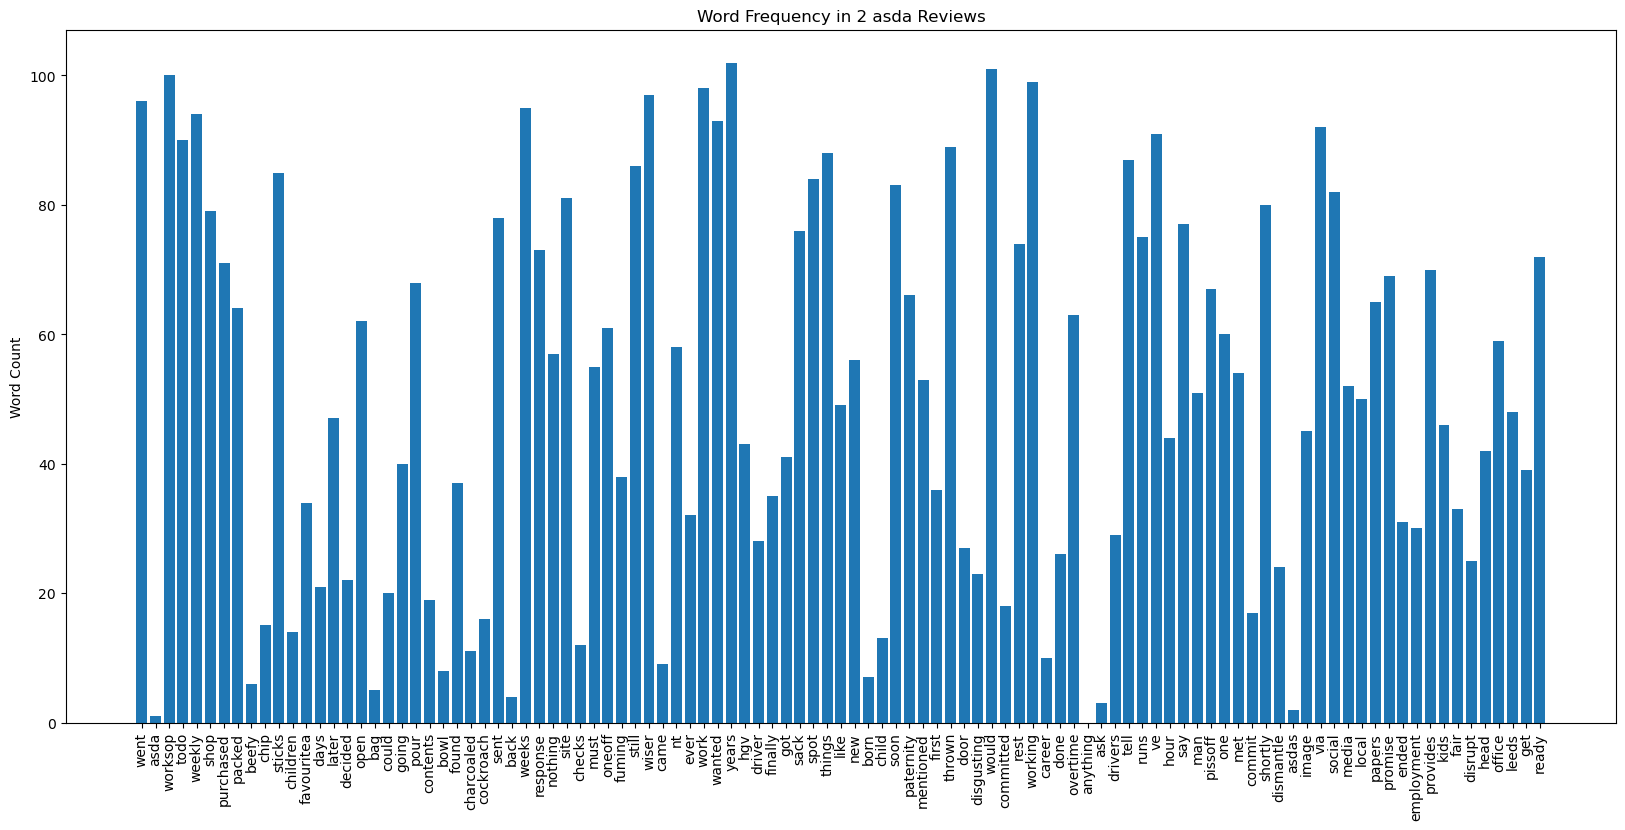

In [189]:
# a bar plot to visualize the word frequency in two ASDA reviews
# Extracting vocabulary items (word, index) sorted by key
lists = vectorizer.vocabulary_.items()

# Unpacking the list of tuples into two tuples for plotting
x, y = zip(*lists)

# Plotting word frequency
plt.figure(figsize=(20, 9))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 2 ASDA Reviews')
plt.ylabel('Word Count')
plt.show()


### TFIDF

TfidfVectorizer from scikit-learn is used to convert a collection of raw text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. It is used to convert a collection of raw text documents into a numerical format that can be used for machine learning tasks

In [190]:
# Importing TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Extracting text data for the first two reviews
text = asda_data['No_Stop_Words:Sentence'][0:2]

# Initializing and fitting the TfidfVectorizer
Tvectorizer = TfidfVectorizer()
Tvectorizer.fit(text)

# Transforming the text data into a TF-IDF matrix
Tvector = Tvectorizer.transform(text)

# Displaying summary information
print('List of unique Words: ', Tvectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ', Tvector.shape)
print('')
print(Tvector.toarray())


List of unique Words:  {'went': 96, 'asda': 1, 'worksop': 100, 'todo': 90, 'weekly': 94, 'shop': 79, 'purchased': 71, 'packed': 64, 'beefy': 6, 'chip': 15, 'sticks': 85, 'children': 14, 'favouritea': 34, 'days': 21, 'later': 47, 'decided': 22, 'open': 62, 'bag': 5, 'could': 20, 'going': 40, 'pour': 68, 'contents': 19, 'bowl': 8, 'found': 37, 'charcoaled': 11, 'cockroach': 16, 'sent': 78, 'back': 4, 'weeks': 95, 'response': 73, 'nothing': 57, 'site': 81, 'checks': 12, 'must': 55, 'oneoff': 61, 'fuming': 38, 'still': 86, 'wiser': 97, 'came': 9, 'nt': 58, 'ever': 32, 'work': 98, 'wanted': 93, 'years': 102, 'hgv': 43, 'driver': 28, 'finally': 35, 'got': 41, 'sack': 76, 'spot': 84, 'things': 88, 'like': 49, 'new': 56, 'born': 7, 'child': 13, 'soon': 83, 'paternity': 66, 'mentioned': 53, 'first': 36, 'thrown': 89, 'door': 27, 'disgusting': 23, 'would': 101, 'committed': 18, 'rest': 74, 'working': 99, 'career': 10, 'done': 26, 'overtime': 63, 'anything': 0, 'ask': 3, 'drivers': 29, 'tell': 87

### Bigrams and min/max_df

This will turn tokens into more unique pairs. Bigrams in the vectorization process allows the model to capture not only individual words but also relationships between consecutive words. 

In [191]:
# Extracting a subset of text data for analysis
text = asda_data['No_Stop_Words:Sentence'][0:2]

# Creating a CountVectorizer with the option for unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1,2))
vectorizer.fit(text)

# Transforming the text into a sparse matrix of n-gram counts
vector = vectorizer.transform(text)

# Displaying vocabulary, matrix shape, and the dense representation
print('List of unique Words: ', vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ', vector.shape)
print('')
print(vector.toarray())


List of unique Words:  {'went': 203, 'asda': 2, 'worksop': 211, 'todo': 189, 'weekly': 198, 'shop': 167, 'purchased': 152, 'packed': 138, 'beefy': 15, 'chip': 33, 'sticks': 179, 'children': 30, 'favouritea': 73, 'days': 46, 'later': 102, 'decided': 48, 'open': 134, 'bag': 13, 'could': 44, 'going': 86, 'pour': 146, 'contents': 42, 'bowl': 19, 'found': 79, 'charcoaled': 24, 'cockroach': 35, 'sent': 165, 'back': 11, 'weeks': 200, 'response': 155, 'nothing': 123, 'site': 171, 'checks': 26, 'must': 119, 'oneoff': 132, 'fuming': 82, 'still': 181, 'wiser': 205, 'came': 21, 'went asda': 204, 'asda worksop': 5, 'worksop todo': 212, 'todo weekly': 190, 'weekly shop': 199, 'shop purchased': 168, 'purchased packed': 153, 'packed beefy': 139, 'beefy chip': 16, 'chip sticks': 34, 'sticks children': 180, 'children favouritea': 32, 'favouritea days': 74, 'days later': 47, 'later decided': 103, 'decided open': 49, 'open bag': 135, 'bag children': 14, 'children could': 31, 'could going': 45, 'going pour

Using CountVectorizer to convert a collection of the review data into a numerical format, considering both unigrams and bigrams, while excluding terms that appear in fewer than two documents.

In [192]:
# Extracting a subset of the 'No_Stop_Words:Sentence' column for demonstration
text = asda_data['No_Stop_Words:Sentence'][0:3]

# Creating a CountVectorizer with bigrams and setting minimum document frequency to 2
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=2)
vectorizer.fit(text)

# Transforming the text data into a sparse matrix
vector = vectorizer.transform(text)

# Summary information
print('List of unique Words: ', vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix: ', vector.shape)
print('')
print(vector.toarray())


List of unique Words:  {'asda': 0, 'later': 3, 'going': 2, 'weeks': 6, 'response': 4, 'still': 5, 'would': 7, 'get': 1}

Shape of the Sparse Matrix  (3, 8)

[[2 0 1 1 1 1 1 0]
 [2 1 1 0 0 0 1 4]
 [1 1 0 1 1 1 1 2]]


A bar plot to visualize the word frequency in 3 reviews using the CountVectorizer. It specifically uses bigrams (n-grams of size 2) and sets a minimum document frequency of 2 for a word to be included. 

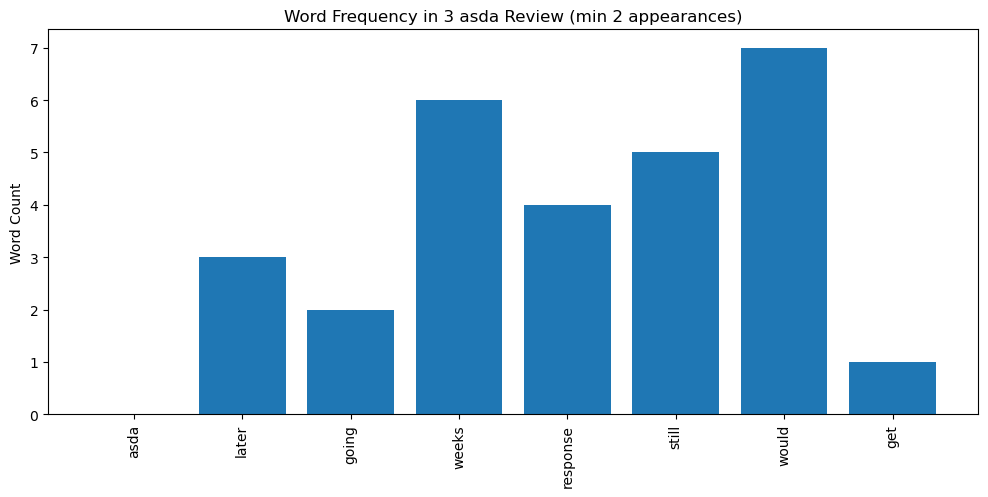

In [193]:
# Get the vocabulary items sorted by key (word index)
lists = vectorizer.vocabulary_.items()

# Unpack the list of pairs into two tuples
x, y = zip(*lists)

# Create a bar plot of word frequencies
plt.figure(figsize=(12, 5))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 3 ASDA Reviews (min 2 appearances)')
plt.ylabel('Word Count')
plt.show()


## Training Dataset

The first step is to use CountVectorizer and TfidfVectorizer on the stemmed sentences so the text reviews can be in numerical format which will be used for modeling

In [225]:
# Using CountVectorizer to transform the stemmed sentences in 'Stemmed:Sentence' column
text = asda_data['Stemmed:Sentence']
vectorizer = CountVectorizer()

# Fitting the vectorizer to the text data
vectorizer.fit(text)

# Transforming the text data into a sparse matrix of word counts
vector = vectorizer.transform(text)

In [230]:
# Creating a DataFrame from the CountVectorizer sparse matrix with additional columns
voc1 = vectorizer.vocabulary_
dfvc = pd.DataFrame(vector.toarray(), columns=voc1)

# Adding columns from the original 'asda_data' DataFrame to the new DataFrame
dfvc.insert(0, 'User', asda_data['User'])
dfvc.insert(1, 'ReviewContent', asda_data['ReviewContent'])
dfvc.insert(2, 'Polarity', asda_data['Polarity'])
dfvc.insert(3, 'Sentiment', asda_data['sentiment'])
dfvc.insert(4, 'Positive_Words_Percent', asda_data['Positive_Words_Percent'])


Accuracy Score:  0.8576158940397351

Overall Statistics : 

ACC Macro                                                         0.85762
F1 Macro                                                          0.85269
FPR Macro                                                         0.15198
Kappa                                                             0.7064
NPV Macro                                                         0.86358
Overall ACC                                                       0.85762
PPV Macro                                                         0.86358
SOA1(Landis & Koch)                                               Substantial
TPR Macro                                                         0.84802
Zero-one Loss                                                     430

Class Statistics :

Classes                                                           Negative      Positive      
ACC(Accuracy)                                                     0.85762       0.857

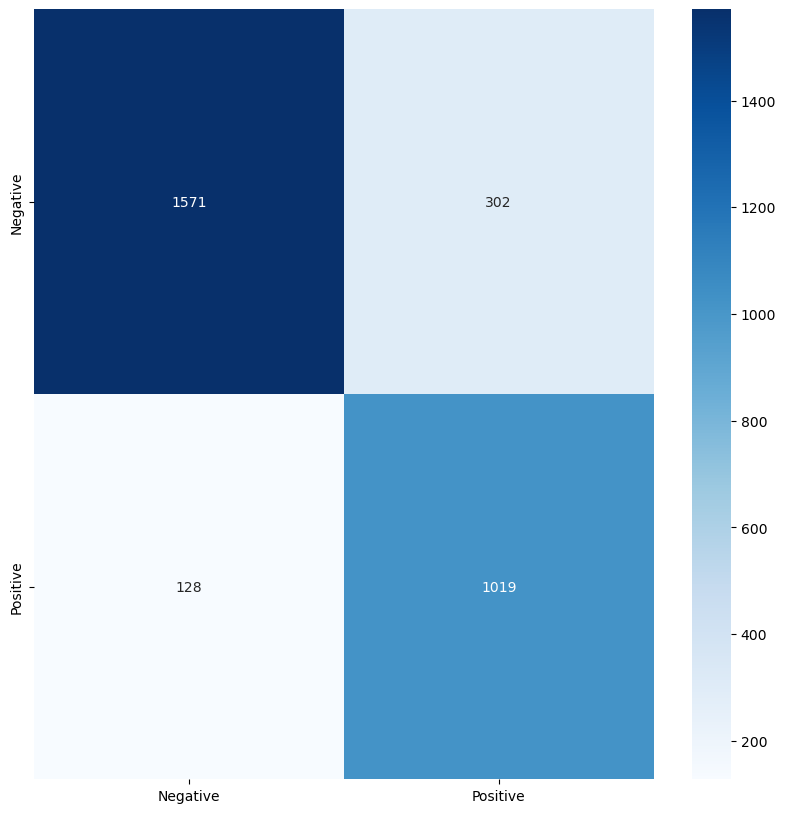

In [232]:
# Building a sentiment classification model using logistic regression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from pycm import *

# Separating features (X) and target variable (y)
X1 = dfvc.iloc[0:, 4:]
y1 = dfvc.Sentiment

# Splitting the dataset into training and testing sets
X1train, X1test, y1train, y1test = train_test_split(X1, y1, random_state=0, test_size=0.3)

# Building a logistic regression model
clf21 = LogisticRegression(solver='lbfgs')
modelvc = Pipeline([('classifier', clf21)])
modelvc.fit(X1train, y1train)

# Making predictions on the test set
predictionsvc = modelvc.predict(X1test)

# Creating a confusion matrix and visualizing it
mat1 = confusion_matrix(predictionsvc, y1test)
cm_dfvc = pd.DataFrame(mat1, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(10, 10))
sns.heatmap(cm_dfvc, annot=True, cmap='Blues', fmt='g')

# Evaluating the model performance
cmvc = ConfusionMatrix(actual_vector=list(y1test), predict_vector=list(predictionsvc))
print('Accuracy Score: ', accuracy_score(predictionsvc, y1test))
print('')
cmvc.stat(summary=True)


In [233]:
# Using TfidfVectorizer to transform the stemmed sentences in 'Stemmed:Sentence' column
text = asda_data['Stemmed:Sentence']
Tvectorizer = TfidfVectorizer()

# Fitting the vectorizer to the text data
Tvectorizer.fit(text)

# Transforming the text data into a sparse matrix of TF-IDF features
Tvector = Tvectorizer.transform(text)


Combining the TFIDF features with the main dataframe and renaiming it df

In [234]:
# Creating a DataFrame from the TF-IDF sparse matrix with additional columns
voc = Tvectorizer.vocabulary_
df = pd.DataFrame(Tvector.toarray(), columns=voc)

# Adding columns from the original 'asda_data' DataFrame to the new DataFrame
df.insert(0, 'User', asda_data['User'])
df.insert(1, 'ReviewContent', asda_data['ReviewContent'])
df.insert(2, 'Polarity', asda_data['Polarity'])
df.insert(3, 'Sentiment', asda_data['sentiment'])
df.insert(4, 'Positive_Words_Percent', asda_data['Positive_Words_Percent'])


Next I will train a logistic regression model on TF-IDF features for sentiment analysis, evaluates its performance on a test set, and visualizes the results using a confusion matrix and additional statistics.

Accuracy Score:  0.8397350993377484

Overall Statistics : 

ACC Macro                                                         0.83974
F1 Macro                                                          0.83329
FPR Macro                                                         0.17191
Kappa                                                             0.66834
NPV Macro                                                         0.84798
Overall ACC                                                       0.83974
PPV Macro                                                         0.84798
SOA1(Landis & Koch)                                               Substantial
TPR Macro                                                         0.82809
Zero-one Loss                                                     484

Class Statistics :

Classes                                                           Negative      Positive      
ACC(Accuracy)                                                     0.83974       0.83

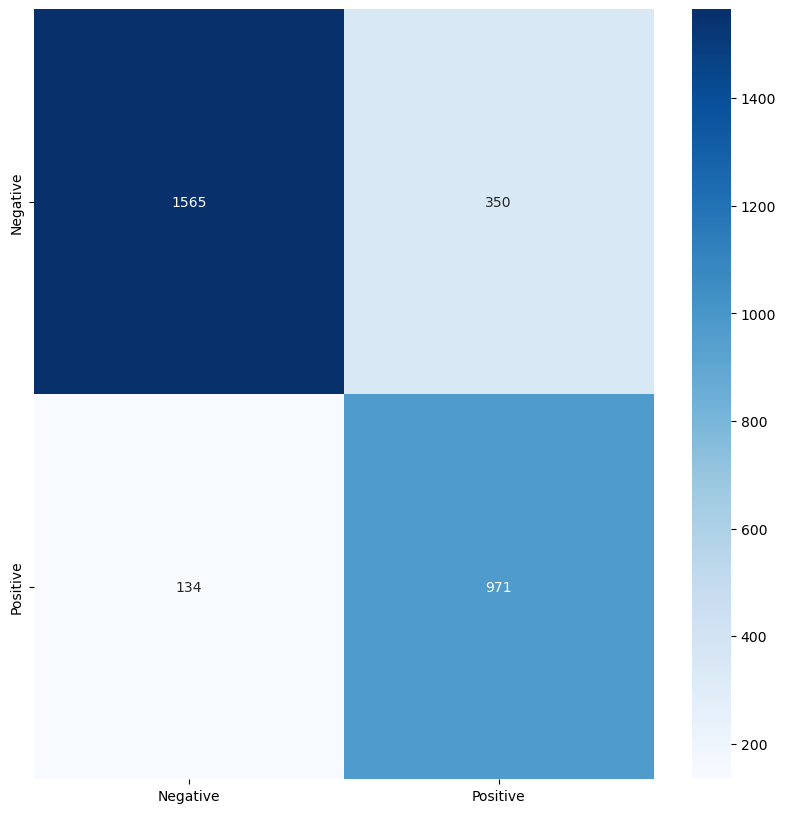

In [235]:
# Building a sentiment classification model using logistic regression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from pycm import *

# Separating features (X) and target variable (y)
X = df.iloc[0:, 4:]
y = df.Sentiment

# Splitting the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=0.3)

# Building a logistic regression model
clf2 = LogisticRegression(solver='lbfgs')
model = Pipeline([('classifier', clf2)])
model.fit(Xtrain, ytrain)

# Making predictions on the test set
predictions = model.predict(Xtest)

# Creating a confusion matrix and visualizing it
mat = confusion_matrix(predictions, ytest)
cm_df = pd.DataFrame(mat, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')

# Evaluating the model performance
cm = ConfusionMatrix(actual_vector=list(ytest), predict_vector=list(predictions))
print('Accuracy Score: ', accuracy_score(predictions, ytest))
print('')
cm.stat(summary=True)


both with accuracy 85 and 83, this is similar. i will go with the TDIDF since it emphasizes the importance of words in individual document relative to their occurence in the entire review. This is impoartant because reviews are written by different indivduals who are expressing thier own thoughts.

This is great, next i will change the number of ngrams and the minimum/maximum number of occurence in the TFIDF vectorizer. this wil enable me get the optimal value

In [197]:
# Function to test the effect of min_df parameter on accuracy scores
def mindf_test(numbers):
    scores = {}
    for num in numbers:
        # Vectorizing the text with TfidfVectorizer and setting min_df=num
        text = asda_data['Stemmed:Sentence']
        Tvectorizer = TfidfVectorizer(min_df=num)
        Tvectorizer.fit(text)
        Tvector = Tvectorizer.transform(text)
        
        # Creating a DataFrame from the Tfidf matrix
        voc = Tvectorizer.vocabulary_
        df = pd.DataFrame(Tvector.toarray(), columns=voc)

        # Adding relevant columns from the original dataframe to the new dataframe
        col_name1 = 'User'
        col_name2 = 'ReviewContent'
        col_name3 = 'Polarity'
        col_name4 = 'Sentiment'
        col_name5 = 'Positive_Words_Percent'

        col1 = asda_data['User']
        col2 = asda_data['ReviewContent']
        col3 = asda_data['Polarity']
        col4 = asda_data['sentiment']
        col5 = asda_data['Positive_Words_Percent']

        df.insert(0, col_name1, col1)
        df.insert(1, col_name2, col2)
        df.insert(2, col_name3, col3)
        df.insert(3, col_name4, col4)
        df.insert(4, col_name5, col5)
        
        # Splitting the dataset and building a logistic regression model
        X = df.iloc[0:, 4:]
        y = df.Sentiment

        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=0.3)

        clf2 = LogisticRegression(solver='lbfgs')
        model = Pipeline([('classifier', clf2)])
        model.fit(Xtrain, ytrain)
        predictions = model.predict(Xtest)
        
        # Calculating accuracy score and storing it in the scores dictionary
        score = accuracy_score(predictions, ytest)
        scores[num] = score
    return scores


In [198]:
#list of minimum number if occurance
min_list1 = list(range(5,50))

In [199]:
# Testing the effect of min_df on accuracy scores for the given list of min_df values
scores_list1 = mindf_test(min_list1)


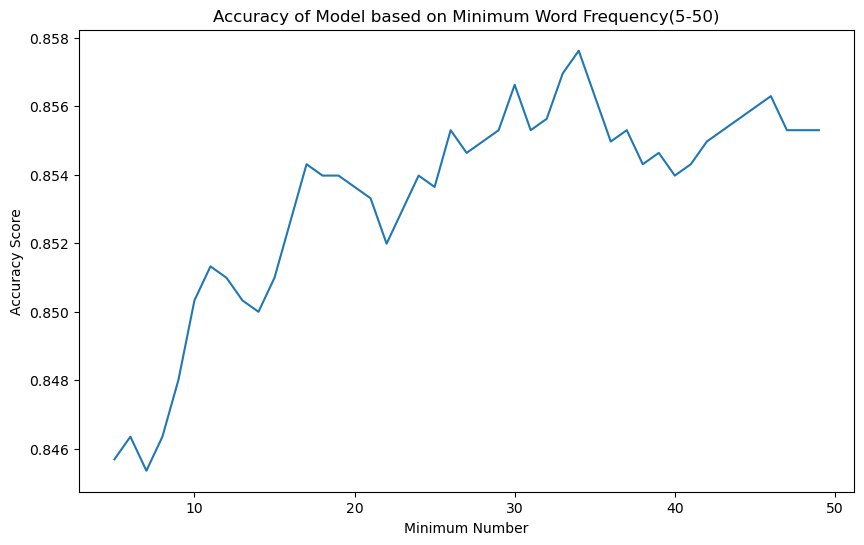

In [200]:
# Plotting the accuracy scores based on different minimum document frequency values
x = scores_list1.keys()
y = scores_list1.values()
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title('Accuracy of Model based on Minimum Word Frequency (5-50)')
plt.xlabel('Minimum Number')
plt.ylabel('Accuracy Score')


as the minimum occurrence goes up the accuracy increases. I will then check from range 19-80

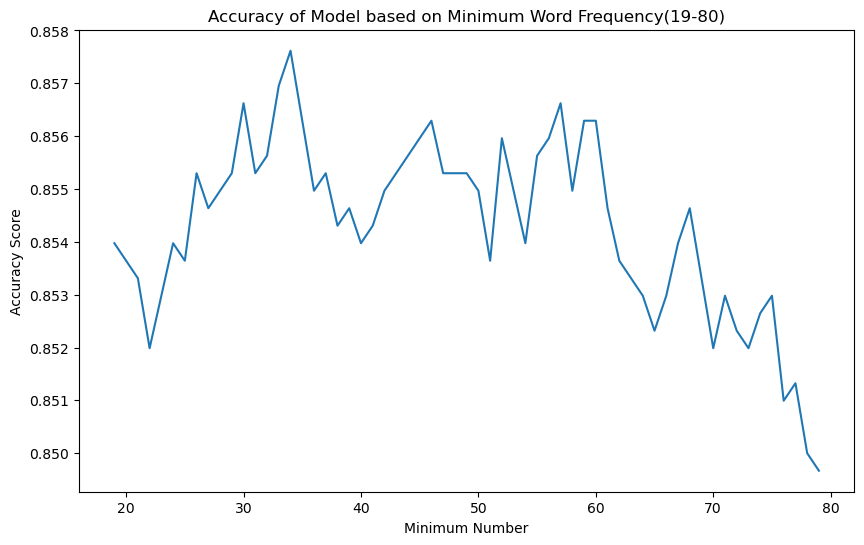

In [201]:
# Testing the effect of min_df parameter on accuracy scores for CountVectorizer
min_list2 = list(range(19, 80))
scores_list2 = mindf_test(min_list2)

# Plotting the accuracy scores for different min_df values
x = scores_list2.keys()
y = scores_list2.values()
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Accuracy of Model based on Minimum Word Frequency (19-80) for CountVectorizer')
plt.xlabel('Minimum Number')
plt.ylabel('Accuracy Score')


In [202]:
# Finding the minimum word frequency value that gives the highest accuracy
import operator
best_min_df = max(scores_list2.items(), key=operator.itemgetter(1))[0]


34

In [203]:
# Function to test the effect of n-gram range on accuracy scores
def ngrams_test(numbers):
    scores = {}
    for num in numbers:
        # Vectorizing the text with TfidfVectorizer and setting n-gram range and min_df values
        text = asda_data['Stemmed:Sentence']
        Tvectorizer = TfidfVectorizer(ngram_range=(0, num), min_df=34)
        Tvectorizer.fit(text)
        Tvector = Tvectorizer.transform(text)
        
        # Creating a DataFrame from the Tfidf matrix
        voc = Tvectorizer.vocabulary_
        df = pd.DataFrame(Tvector.toarray(), columns=voc)

        # Adding relevant columns from the original dataframe to the new dataframe
        col_name1 = 'User'
        col_name2 = 'ReviewContent'
        col_name3 = 'Polarity'
        col_name4 = 'Sentiment'
        col_name5 = 'Positive_Words_Percent'

        col1 = asda_data['User']
        col2 = asda_data['ReviewContent']
        col3 = asda_data['Polarity']
        col4 = asda_data['sentiment']
        col5 = asda_data['Positive_Words_Percent']

        df.insert(0, col_name1, col1)
        df.insert(1, col_name2, col2)
        df.insert(2, col_name3, col3)
        df.insert(3, col_name4, col4)
        df.insert(4, col_name5, col5)
        
        # Splitting the dataset and building a logistic regression model
        X = df.iloc[0:, 4:]
        y = df.Sentiment

        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=0.3)

        clf2 = LogisticRegression(solver='lbfgs')
        model = Pipeline([('classifier', clf2)])
        model.fit(Xtrain, ytrain)
        predictions = model.predict(Xtest)
        
        # Calculating accuracy score and storing it in the scores dictionary
        score = accuracy_score(predictions, ytest)
        scores[num] = score
    return scores


In [204]:
# Testing the effect of n-gram range on accuracy scores
ngram_list = [0, 1, 2, 3, 4]
ngram_scores = ngrams_test(ngram_list)


Text(0, 0.5, 'Accuracy Score')

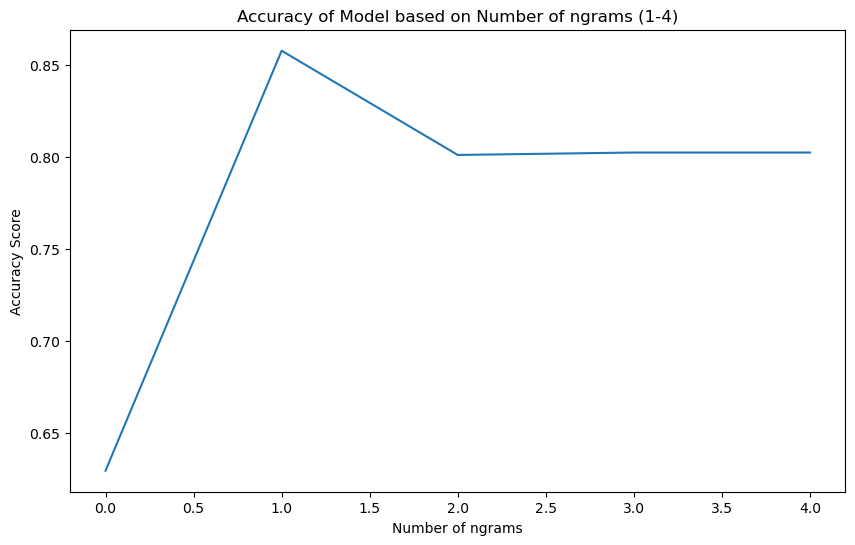

In [205]:
# Visualizing the effect of the number of n-grams on accuracy scores
x = ngram_scores.keys()
y = ngram_scores.values()
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title('Accuracy of Model based on Number of n-grams (1-4)')
plt.xlabel('Number of n-grams')
plt.ylabel('Accuracy Score')


best number here is ngrams = 1. for the TFIDF output the ideal number will be 1 ngrams and min_df = 34

In [206]:
# Vectorizing the text using TfidfVectorizer with specific parameters
text = asda_data['Stemmed:Sentence']
Tvectorizer = TfidfVectorizer(min_df=34, ngram_range=(0, 1))
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)

# Creating a DataFrame from the TF-IDF matrix with additional columns
voc = Tvectorizer.vocabulary_
df = pd.DataFrame(Tvector.toarray(), columns=voc)

# Adding columns from the original 'asda_data' DataFrame to the new DataFrame
col_name1 = 'User'
col_name2 = 'ReviewContent'
col_name3 = 'Polarity'
col_name4 = 'Sentiment'
col_name5 = 'Positive_Words_Percent'

col1 = asda_data['User']
col2 = asda_data['ReviewContent']
col3 = asda_data['Polarity']
col4 = asda_data['sentiment']
col5 = asda_data['Positive_Words_Percent']

df.insert(0, col_name1, col1)
df.insert(1, col_name2, col2)
df.insert(2, col_name3, col3)
df.insert(3, col_name4, col4)
df.insert(4, col_name5, col5)


In [207]:
df.head()

,User,ReviewContent,Polarity,Sentiment,Positive_Words_Percent,went,asda,week,shop,purchas,pack,stick,child,day,later,decid,open,bag,could,go,found,sent,back,respons,noth,site,check,must,fume,still,came,nt,ever,work,want,year,driver,final,got,sack,spot,thing,like,new,soon,mention,first,thrown,door,disgust,would,rest,done,anyth,ask,tell,run,ve,hour,say,man,one,met,short,via,social,medium,local,paper,promis,end,employ,provid,kid,fair,head,offic,get,readi,order,onlin,amend,inform,item,stock,deliv,total,rais,charg,card,initi,support,gone,refund,point,meet,keep,money,communic,may,need,use,parti,credit,wast,time,consid,oper,practic,rubbish,mani,everi,said,oh,took,never,pathet,servic,compani,rude,staff,member,behind,counter,complain,sub,manag,young,girl,secur,guard,accus,aggress,detail,month,job,seem,happen,along,branch,shock,attitud,disgrac,complaint,truli,bad,supermarket,busi,given,click,collect,box,put,reserv,half,told,remain,account,singl,night,attempt,amount,ring,help,updat,system,continu,anoth,person,seen,glitch,ok,repeat,tri,add,made,error,owe,bristol,talk,call,centr,sort,issu,stop,next,morn,paid,twice,constant,theft,speak,aw,health,build,better,budget,appal,stress,deliveri,come,notic,leak,onto,broken,chicken,make,liter,left,hold,age,hang,reject,request,store,extrem,employe,disrespect,custom,experi,will,spend,elsewher,avoid,usual,give,improv,appar,return,window,process,trolley,full,stuff,kitchen,etc,wait,thought,trust,miss,kept,home,almost,receiv,despit,multipl,demand,resolv,ca,nobodi,deal,much,shopper,imagin,profit,simpli,product,scam,allow,present,becom,virtual,huge,sign,evid,photo,friday,juli,arriv,park,pay,trolli,abrupt,reach,entranc,close,complet,trip,switch,around,car,cover,incorrect,advertis,live,floor,apart,stair,near,carri,coupl,tray,load,hous,refus,start,alway,consider,pleasant,find,lucki,lazi,general,poor,reward,compar,tesco,look,toilet,absolut,mean,right,cafe,eat,shut,tomorrow,doubt,lot,star,payment,four,ago,cancel,food,bank,assist,nowher,anyon,team,review,idea,instor,visit,within,book,friend,standard,howev,drop,groceri,loos,experienc,meant,number,damag,whether,human,substitut,often,far,remov,exampl,tin,perhap,free,easi,fix,case,iceland,problem,mayb,follow,joke,useless,submit,clear,interest,unhappi,chang,origin,slot,midnight,unlik,unhelp,famili,feed,peopl,addit,fund,needl,incompet,bother,address,chocol,ruin,meat,date,although,websit,shelf,life,picker,obvious,care,know,probabl,rid,reli,treat,second,class,realli,disappoint,price,list,contact,form,repli,messag,shame,certain,georg,late,scan,app,phone,checkout,code,expir,log,lose,also,way,answer,email,option,utter,deserv,place,rate,broke,larg,big,street,heard,expect,ad,everyth,basket,thank,fail,see,someon,pass,alreadi,cant,believ,unabl,take,good,decent,pension,bunch,attent,fact,till,higher,bought,coffe,note,receipt,exact,today,brand,weight,label,differ,import,especi,realis,lower,notif,extra,minut,offer,insult,voucher,terribl,zero,row,turn,els,track,line,unreli,let,regard,chanc,taken,explain,properti,dead,therefor,spoke,explan,even,pick,earth,dealt,profession,mistak,morrison,reliabl,mark,kind,re,accept,confirm,ill,stolen,arrang,overcharg,sell,nightmar,replac,quit,last,christma,spent,due,forgot,immedi,though,regular,basi,wife,blue,light,benefit,feel,quick,cost,effect,lidl,qualiti,produc,prefer,sainsburi,long,part,waitros,travel,distanc,move,worst,think,overal,wors,third,world,public,state,machin,round,self,desk,polit,cheer,septemb,fish,finger,essenti,instead,buy,write,express,unaccept,whole,sorri,result,bloodi,unavail,frozen,correct,page,show,rang,advis,either,fast,fault,mother,yet,send,wo,mum,yesterday,includ,beer,flat,tast,bottom,saw,august,deni,outsid,proof,suggest,pocket,abus,print,toward,touch,push,hand,law,front,everyon,sever,polic,enough,discrimin,behaviour,fill,sinc,serv,finish,milk,bread,approv,possibl,honest,steal,basic,bit,anyway,littl,shout,question,spoken,daughter,older,woman,walk,away,apologis,old,amaz,face,aldi,across,save,expens,throw,mail,delay,agre,pop,po

with this features I have a very good accuracy of 85%. next will apply these with better models

In [208]:
df.to_csv(r'asda_model_sentiment.csv', index=False)